# **\[Note\]** 우분투 포맷 및 개발용 서버 셋팅2

신록예찬  
2000-01-02

# About this doc

`-` 우분투에서 여러가지 개발환경을 설정하는 방법을 포스팅 (시대가 너무
바뀌어서 새로정리)

# 1. 우분투설치

`-` 22.04부터는 파티션 나누지 않고 그냥 설치해도 잘 되는것 같다.

# 2. 네트워크 설정

`-` `?`표시있는 아이콘 $\to$ Wired Connected $\to$ Wired Settings $\to$
Connection의 설정 $\to$ IPv4 $\to$ Manual $\to$ Address, Netmask,
Gateway, DNS 설정 $\to$ 네트워크 토글

# 3. 그래픽카드 드라이버설치

`-` 전체적인 내용은
[여기](https://gist.github.com/bendangnuksung/981408031699e0ddc50a6f6fdcf185c2)를
참고하자.

`-` 준비작업

``` default
sudo apt update 
sudo apt install gcc
sudo apt install build-essential
```

`-` 우선 `gedit`를 열고 아래를 복사해서 붙여넣는다.

``` default
blacklist nouveau
options nouveau modeset=0
```

파일이름을 `blacklist-nouveau.conf`로 `home`에 저장

`-` 루트권한획득

``` default
sudo -i
```

아이디와 비밀번호를 입력하고 루트권한을 얻는다.

`-` 아래를 입력한다.

``` default
sudo cp /home/cgb2/blacklist-nouveau.conf /etc/modprobe.d
sudo update-initramfs -u
sudo reboot 
```

`-` 그래픽카드 다운로드: 드라이버 설치파일을 다운받는다.
[앤비디아공식홈페이지](https://www.geforce.com/drivers)에서 다운받자.
OS를 리눅스 64-bit으로 선택하고 검색을 누르면 다운받아진다.

`-` 그래픽키다 설치: 다운받은뒤에는 파일이 있는 폴더로 이동하여

``` default
chmod +x NVIDIA-Linux-x86_64-410.78.run
```

를 실행하자. 보통 `NVI`까지치고 적당히 `탭`을 누르면 알아서 뒷부분이
완성된다. 이 과정은 추후에 드라이버를 실행할수 있도록 권한을 풀어두는
것이다. 그리고 아래를 실행한다.

``` default
sudo ./NVIDIA-Linux-x86_64-410.78.run
```

그 다음 드라이버가 잘 설치되었는지 확인한다.

``` default
nvidia-smi
```

# 4. ssh연결

`-` 처음에 ssh를 연결하기위해서는 연결**당하는** 컴퓨터에 가서 아래를
실행해야 한다.

    sudo apt install openssh-server

***22번포트 우회하기***

`-` step1: `/etc/ssh/sshd_config` 파일을 연다.

``` default
sudo vi /etc/ssh/sshd_config 
```

`-` step2: Port 22 라고 된 부분의 주석을 풀고 원하는 포트번호 설정

``` default
...

#Port 22
#AddressFamily any
#ListenAddress 0.0.0.0
#ListenAddress ::

...
```

`-` step3: 수정내용을 적용

``` default
sudo systemctl restart ssh.service
```

`-` step4: 수정한 포트로 ssh접속

# 5. 아나콘다

`-` (아나콘다 설치) 아나콘다를 다운받은 폴더로 가서 아래와 같이
실행한다.

``` default
bash Anaconda3-2019.03-Linux-x86_64.sh
```

대충 `bash Ana` 정도까지만 치고 `tab`을 누르면 알아서 완성된다.

# 6. 개발환경

## `6-1`. R+Python 사용가능한 개발환경

`-` 아래를 실행

``` default
(base) conda create -n rpy 
(base) conda activate rpy
(rpy) conda install -c conda-forge r-essentials
(rpy) conda install -c conda-forge plotly
(rpy) pip install ryp2 
```

`-` 여기에서 `conda install -c conda-forge r-essentials`로 인하여 R,
Python, Jupyter 가 모두 최신버전으로 설치된다.

`-` 또한 R에는 이미 `tidyverse`, `IRkernel` 등의 패키지가 기본으로
깔려있다.

`-` R은 아래의 경로에 설치되어있다.

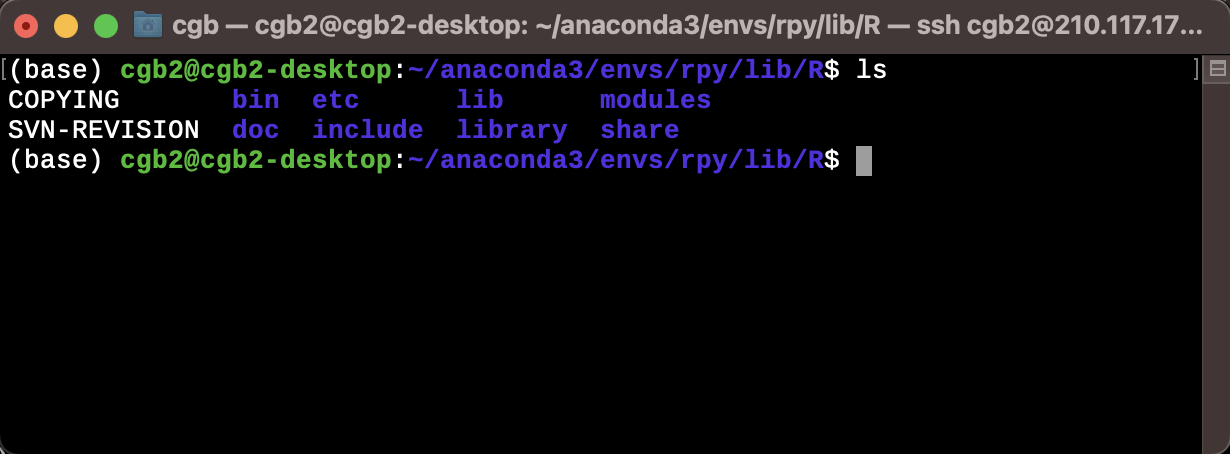

`-` 실행파일은 bin 폴더에 있다.

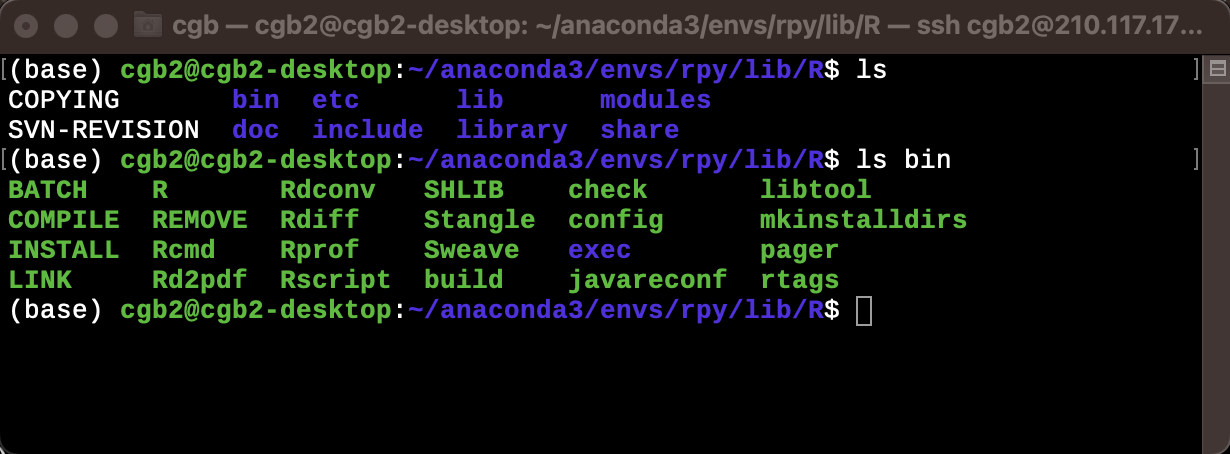

`(base)` 환경이지만 이곳의 실행파일에 직접 접근하여 실행할 수도 있다.

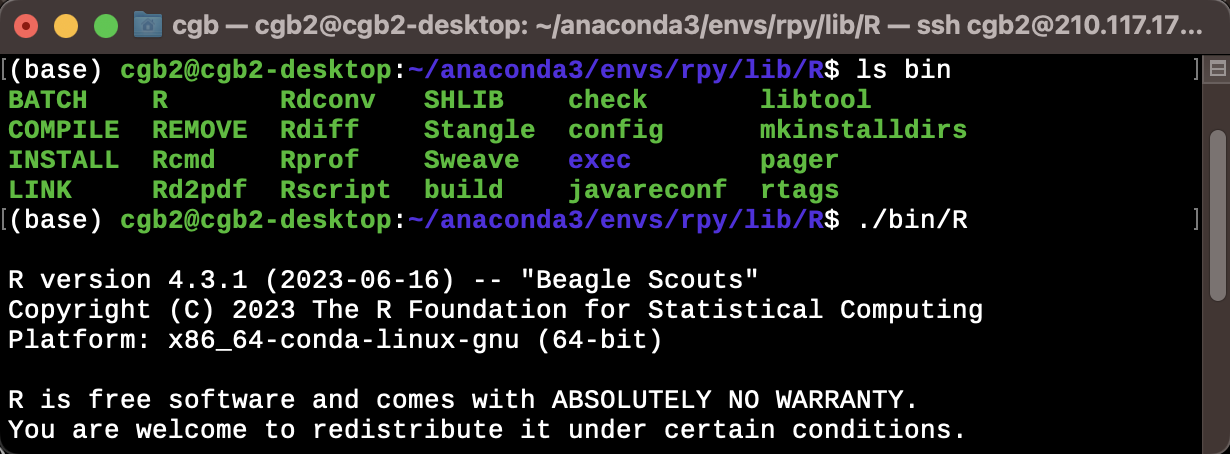

`-` 설치한 패키지는 library 폴더에 있다. /// `EPT`도 보인다..

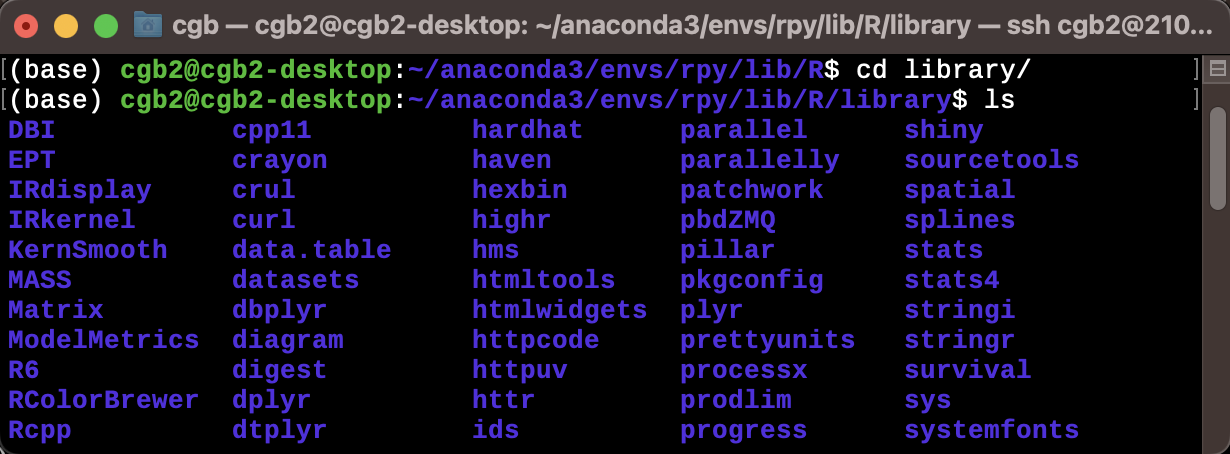

## `6-2`. PyTorch 사용이 가능한 개발환경

`-` 아래를 실행

``` default
(base) conda create -n torch
(base) conda activate torch
(torch) conda install pytorch torchvision torchaudio pytorch-cuda=11.8 -c pytorch -c nvidia
(torch) conda install -c conda-forge notebook 
(torch) conda install -c conda-forge plotly 
(torch) conda install pyg -c pyg 
(torch) pip install torch-geometric-temporal
(torch) conda install -c pytorch -c conda-forge ctgan
(torch) pip install gymnasium 
(torch) pip install gymnasium[box2d]
```

**refs**

-   PyTorch: <https://pytorch.org/get-started/locally/>
-   PyG:
    <https://pytorch-geometric.readthedocs.io/en/latest/install/installation.html>
-   PyTorch Geometric Temporal[1]:
    <https://pytorch-geometric-temporal.readthedocs.io/en/latest/notes/installation.html>
-   CTGAN: <https://github.com/sdv-dev/CTGAN>
-   Gymnasium: <https://gymnasium.farama.org/index.html>[2]

# 7. 주피터 원격제어 설정

`-` 설정파일 생성

``` default
(rpy) jupyter notebook --generate-config
```

`-` 패스워드 설정

``` default
(rpy) jupyter notebook password
## 패스워드 치고
## 확인해야함
```

`-` 설정파일을 열고

``` default
nano /home/cgb2/.jupyter/jupyter_notebook_config.py
```

아래의 내용을 수정한다.

``` default
c.ServerApp.ip = '192.168.0.4'
c.ServerApp.port = 1306
c.ServerApp.open_browser=False 
c.ExtensionApp.open_browser=False
c.ServerApp.allow_origin = '*'
c.ServerApp.allow_remote_access = True
```

# 8. 설치하면 좋은것들

`-` 데이터과학을 위한 패키지들

``` default
pip install plotnine
pip install seaborn
pip install opencv-python
pip install folium
pip install pandas_datareader
```

`-` 아래를 설치하면 좋음

``` default
sudo apt install mc 
```

# Appendix

## `A1`. R 삭제하는 방법

`-` R 삭제

``` default
conda remove r-base -y 
sudo apt-get remove r-base-core 
sudo apt purge r-base* r-recommended r-cran-*
sudo apt autoremove
```

## `A2`. R 패키지 설치

`-` 주피터등에서 직접설치

`-` conda를 이용한 설치

``` bash
conda install -c r package-name
```

-   <https://docs.anaconda.com/free/anaconda/reference/packages/r-language-pkg-docs/>

## `A3`. 우분투를 주컴퓨터로 사용할 경우 한글설정

`-` 아래와 같이 커맨드에 친다.

``` default
ibus-setup
```

이걸 치면 `IBus Preferences` 라는 창이 나오는데 여기에서 (1)
`Input Method` 탭 클릭 (2) `Add` 버튼 클릭 (3) `Korean` 선택 (4)
`Hangul` 선택을 한다.

`-` 위의 단계에서 `Korean`이 안보이면 `Language Support`로 가서
한국어팩을 설치하고 리부팅 하면 된다. (보통 실행하자마자 알아서
설치되더라.. 설치가 안되면 `Install / Remove Languages...` 이라는 탭을
클릭해서 설치하자) 리부팅을 꼭 해야한다는 것에 주의하자.

`-` 이제 `Region & Language`로 가서 설정하면 된다.

## `A4`. sublime text and TeX

`-` ‘Ubuntu Software’에 가서 ’sublime Text’를 치면 다운받을 수 있다.
다운받은뒤에 ’file’ -\> ’open folder’를 활용하여 깃허브의 로칼저장소를
열어두면 편리하다.

`-` 아래를 실행하여 TeX을 깐다.

``` default
sudo apt install texlive-full
```

`-` 이제 sublime과 latex을 연결하여보자.
[여기](https://latextools.readthedocs.io/en/latest/install/#requirements-and-setup)를
참고하자. (1) sublime을 키고 ‘컨트롤+쉬프트+p’를 눌러 ’Install Package
Control’ 선택 (2) 다시 ‘컨트롤+쉬프트+p’ 를 눌러 ‘Package Control:
Install Package’를 실행 (3) 그러면 바로 검색창이 나오는데 거기서
’LaTeXTools’를 입력해서 실행 (4) 다시 ’컨트롤+쉬프트+p’를 누르고
’LaTeXTools: Check system’ 선택. 모두 ’available’이 나오면 잘 설치된
것이다.

`-` `*.tex`파일을 열고 ’컨트롤+b’를 누르자. 처음이면 어떤 메뉴들이
보일텐데 그냥 ’Latex’을 선택하자. 그러면 코딩결과가 pdf로 나온다.

`-` (수식미리보기) ‘Perferences’ \> ‘Packages Setting’ \> ‘LaTeXTools’
\> ‘Settings-User’를 선택한다. ’93번째라인’에 ’preview_math_mode’를
“all”로 바꾼다. 그러면 수식들이 미리 출력된다. 그외에도 자유롭게 셋팅을
조정할 수 있다. 원래셋팅은 ’Perferences’ \> ‘Packages Setting’ \>
‘LaTeXTools’ \> ‘Settings-Defaults’ 에 있다.

## `A5`. 터미널 예쁘게 만들기

`-` zsh 설치 + oh my zsh 설치

``` default
sudo install zsh 
sh -c "$(curl -fsSL https://raw.githubusercontent.com/robbyrussell/oh-my-zsh/master/tools/install.sh)"
```

`-` 테마변경

1.  .zshrc 파일 열기

``` default
nano ~/.zshrc 
```

1.  아래의 내용 수정

``` default
...
ZSH_THEME="agnoster"
...
```

`-` 색상변경

1.  아래의 파일 열기

``` default
cd ~/.oh-my-zsh/themes/
nano agnoster.zsh-theme  
```

1.  내용수정

``` default
...
prompt_dir() {
  prompt_segment 39d $CURRENT_FG '%~'
}
...
```

[1] 이 패키지는 꼭 PyG 이후에 설치할것

[2] 설치방법은 따로 없음..